<a href="https://colab.research.google.com/github/Masha1304/Amazon-x-TUM-Project-Study/blob/main/OZON_test_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

To complete this task, you need to generate a DataFrame with synthetic data. The DataFrame should consist of 10,000 rows and 5 columns. We suggest you create and fill each column as follows:

1st column – user_id – the user identifier. The length of user_id should be 15 characters. The identifier consists of a random combination of the following characters: "1234567890abcdefghijk". For each row in the DataFrame, the user_id value should be generated randomly.

2nd column – order_number – the order number. The column should be filled with random values in the range from 1 to 10.

3rd column – click2delivery – the time elapsed from the order being placed to it being delivered to the customer. The column should be filled with random values from a normal distribution with a mean of 1440 and a standard deviation of 200.

4th column – order_items_sum – the total cost of the order. The values for this column should be taken from an exponential distribution with a parameter λ = 1, shifted by +1.

5th column – retention – the day of the customer's life on which they made the order. You need to generate the values 1, 2, 3, 4, 5 with probabilities 0.35, 0.25, 0.2, 0.15, and 0.05 respectively.

If duplicate values appear in the user_id column, only keep the first one.



In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

In [2]:
#generating user ids from the following list "1234567890abcdefghijk"
def generating_user_id(n=15):
  return "".join([random.choice("1234567890abcdefghijk") for _ in range(15)])

In [3]:
N = 10_000
n = 10_000

def generating_df(N):
  data = {
      "user_id": [generating_user_id() for _ in range(N)],
      "order_num": [random.randint(1, 10) for _ in range(N)],
      "click2delivery": np.random.normal(1440, 200, size=N),
      "order_items_sum": np.random.exponential(1, size=N) + 1,
      "retention": np.random.choice([1, 2, 3, 4, 5], size=N, p=[0.35, 0.25, 0.2, 0.15, 0.05])
  }
  return pd.DataFrame(data)

df = pd.DataFrame()

while True:
  new_df = generating_df(n)
  df = pd.concat([df, new_df], ignore_index=True)
  df = df.drop_duplicates(subset="user_id", keep="first")
  n = N - len(df)

  if n <= 0:
    break

In [4]:
df

,user_id,order_num,click2delivery,order_items_sum,retention
0,9hdid9j67678fjg,3,1648.798201,1.476814,4
1,5jj3ji13k31ge87,9,1044.661083,1.047326,3
2,cc4ii98kgec6ff9,7,1618.647084,1.040737,3
3,607e98140a713a8,4,1781.161394,1.421244,1
4,d61kihag4f84edg,4,1425.829875,1.495383,1
...,...,...,...,...,...
9995,f1369fe50kde6d0,2,2066.762036,1.708911,3
9996,fg2jf54kfb61f9b,4,1531.379112,2.028044,4
9997,j9fcki6hb829kk9,9,1203.794443,1.314093,4
9998,76hc82f9e7g002h,5,1606.315863,1.661554,1


## Task 2

For all rows in the original dataset, grouped by order number, calculate the average delivery time for each group. The result should be added to a new column in the DataFrame.

In [5]:
orders = (
    df
    .groupby("order_num")["click2delivery"]
    .agg(mean_time="mean")
    .reset_index()
)

,order_num,mean_time
0,1,1444.955336
1,2,1440.915787
2,3,1437.461026
3,4,1432.984478
4,5,1456.554599
5,6,1441.028211
6,7,1435.033630
7,8,1440.886836
8,9,1434.437535
9,10,1438.764694


In [ ]:
orders

In [6]:
df = df.merge(
    orders,
    how="inner"
)

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time
0,9hdid9j67678fjg,3,1648.798201,1.476814,4,1437.461026
1,9feb3ckebccbh1c,3,1164.099238,1.971988,3,1437.461026
2,e640dbi3871d8c2,3,1777.976647,1.443700,1,1437.461026
3,975c4k20e8f9h0j,3,1608.219415,2.227187,3,1437.461026
4,bc85f641fhac18h,3,1448.593462,1.323471,1,1437.461026
...,...,...,...,...,...,...
9995,dd9a28b8jjd2ebi,10,1204.249553,3.475161,2,1438.764694
9996,j5he4j5bcag4hf4,10,1197.271485,1.603779,2,1438.764694
9997,h6541cjf9hj4b53,10,1402.757854,1.700313,5,1438.764694
9998,7b753k4f1bjiah7,10,1046.975076,1.393025,2,1438.764694


In [ ]:
df

## Task 3

Add a separate column with values of a sequence starting with 0 and 1, where each subsequent element is the sum of the two previous elements multiplied by 0.5.

In [7]:
arr = [0, 1]

for i in range(9998):
  arr.append(sum(arr[-2:]) * 0.5)

In [8]:
df["sequence"] = arr

In [9]:
df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,sequence
0,9hdid9j67678fjg,3,1648.798201,1.476814,4,1437.461026,0.000000
1,9feb3ckebccbh1c,3,1164.099238,1.971988,3,1437.461026,1.000000
2,e640dbi3871d8c2,3,1777.976647,1.443700,1,1437.461026,0.500000
3,975c4k20e8f9h0j,3,1608.219415,2.227187,3,1437.461026,0.750000
4,bc85f641fhac18h,3,1448.593462,1.323471,1,1437.461026,0.625000
...,...,...,...,...,...,...,...
9995,dd9a28b8jjd2ebi,10,1204.249553,3.475161,2,1438.764694,0.666667
9996,j5he4j5bcag4hf4,10,1197.271485,1.603779,2,1438.764694,0.666667
9997,h6541cjf9hj4b53,10,1402.757854,1.700313,5,1438.764694,0.666667
9998,7b753k4f1bjiah7,10,1046.975076,1.393025,2,1438.764694,0.666667


## Task 4

Write a function that takes a user_id as input and returns a string in the following format: all the letters in the order they appear in the user_id, followed by the square of the number formed from all the digits in the order they appear in the user_id.

Add the result of applying this function to the user_id in a new column. Using loops outside the function is not allowed.

In [10]:
def processing_user_id(user_id):
  letters = "".join(filter(str.isalpha, user_id))
  digits = "".join(filter(str.isdigit, user_id))

  return f"{letters}{int(digits) ** 2}"

In [15]:
df["new_user_id"] = df["user_id"].apply(processing_user_id)

In [16]:
df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,sequence,new_user_id
0,9hdid9j67678fjg,3,1648.798201,1.476814,4,1437.461026,0.000000,hdidjfjg99354604711684
1,9feb3ckebccbh1c,3,1164.099238,1.971988,3,1437.461026,1.000000,febckebccbhc866761
2,e640dbi3871d8c2,3,1777.976647,1.443700,1,1437.461026,0.500000,edbidc410095742869901124
3,975c4k20e8f9h0j,3,1608.219415,2.227187,3,1437.461026,0.750000,ckefhj951445912648392100
4,bc85f641fhac18h,3,1448.593462,1.323471,1,1437.461026,0.625000,bcffhach73344117117924
...,...,...,...,...,...,...,...,...
9995,dd9a28b8jjd2ebi,10,1204.249553,3.475161,2,1438.764694,0.666667,ddabjjdebi8627065924
9996,j5he4j5bcag4hf4,10,1197.271485,1.603779,2,1438.764694,0.666667,jhejbcaghf2975047936
9997,h6541cjf9hj4b53,10,1402.757854,1.700313,5,1438.764694,0.666667,hcjfhjb4279704830819209
9998,7b753k4f1bjiah7,10,1046.975076,1.393025,2,1438.764694,0.666667,bkfbjiah60115475175889


## Task 5

Calculate the mode, median, mean, and standard deviation for the columns click2delivery, order_items_sum, and retention. Plot histograms of the value distributions in these columns.

In [26]:
df5 = df[["click2delivery", "order_items_sum", "retention"]]

In [27]:
df5

,click2delivery,order_items_sum,retention
0,1648.798201,1.476814,4
1,1164.099238,1.971988,3
2,1777.976647,1.443700,1
3,1608.219415,2.227187,3
4,1448.593462,1.323471,1
...,...,...,...
9995,1204.249553,3.475161,2
9996,1197.271485,1.603779,2
9997,1402.757854,1.700313,5
9998,1046.975076,1.393025,2


In [24]:
df5[["click2delivery", "order_items_sum"]] = df5[["click2delivery", "order_items_sum"]].astype(int)

<ipython-input-24-96347e2e5e6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5[["click2delivery", "order_items_sum"]] = df5[["click2delivery", "order_items_sum"]].astype(int)


,click2delivery,order_items_sum,retention
0,1648,1,4
1,1164,1,3
2,1777,1,1
3,1608,2,3
4,1448,1,1
...,...,...,...
9995,1204,3,2
9996,1197,1,2
9997,1402,1,5
9998,1046,1,2


In [ ]:
df5

In [28]:
df_mode = (
    df5
    .mode()
    .head(1)
    .set_index(pd.Index(["mode"]))
)

In [29]:
df_mode

,click2delivery,order_items_sum,retention
mode,753.927958,1.000118,1.0


In [31]:
df5_1 = (
    df5
    .describe()
    .loc[['mean', 'std', '50%'], :]
)

In [32]:
df5_1

,click2delivery,order_items_sum,retention
mean,1440.361278,2.005680,2.297400
std,198.356227,1.023266,1.229026
50%,1439.404225,1.688402,2.000000


In [33]:
df5_1 = pd.concat([df5_1, df_mode])

In [34]:
df5_1

,click2delivery,order_items_sum,retention
mean,1440.361278,2.005680,2.297400
std,198.356227,1.023266,1.229026
50%,1439.404225,1.688402,2.000000
mode,753.927958,1.000118,1.000000


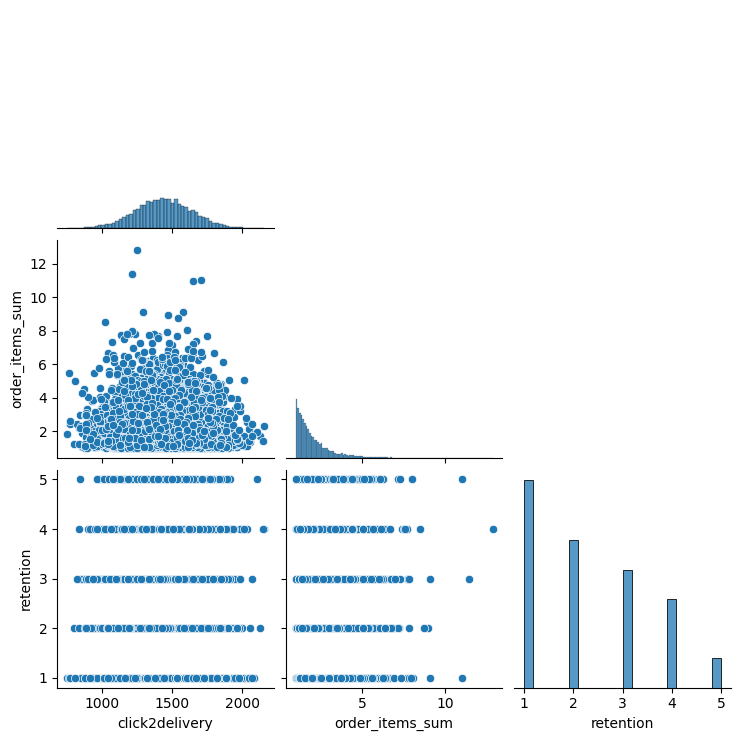

In [39]:
sns.pairplot(df[["click2delivery", "order_items_sum", "retention"]], corner=True);

## Task 6

Create a graph that comprehensively describes the dependency of delivery time on order number.

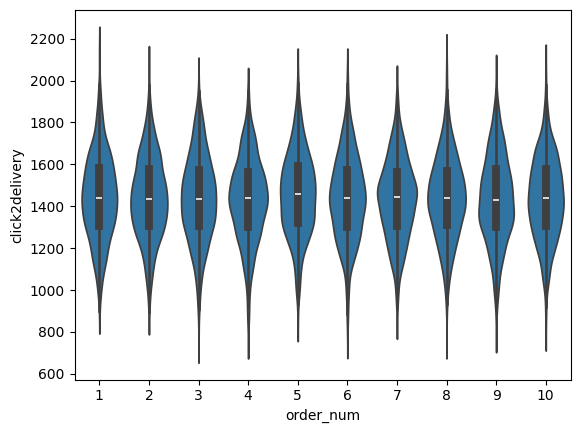

In [40]:
sns.violinplot(data=df[["click2delivery", "order_num"]], x="order_num", y="click2delivery");